In [1]:
%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: E0F2-7830

 C:\Users\Administrator\파이썬수업\data 디렉터리

2022-08-24  오후 07:01    <DIR>          .
2022-08-24  오후 07:01    <DIR>          ..
2022-08-22  오후 07:04    <DIR>          .ipynb_checkpoints
2022-08-22  오후 08:46            10,081 201207_201207_연령별인구현황_월간.xlsx
2022-08-22  오후 09:31            10,171 202207_202207_연령별인구현황_월간.xlsx
2022-07-19  오후 09:04            36,224 boston.csv
2022-08-24  오후 07:01            21,687 happiness_report_2021.csv
2022-08-24  오후 07:01            11,039 happiness_report_2022.csv
2022-08-22  오후 08:06            44,453 kospi.csv
2022-08-10  오후 09:45               219 protoss.csv
2022-08-10  오후 07:08               112 score.csv
2022-08-10  오후 07:11               127 score01.csv
2022-08-10  오후 07:50               127 score1.csv
2022-08-10  오후 09:45               193 terran.csv
2022-08-10  오후 09:45               211 zerg.csv
2022-08-22  오후 08:37             2,002 대한민국인구.csv
2022-08-10  오후 06:36            14,181 스타크래프트엑셀.xlsx
   

In [15]:
import pandas as pd
df2021 = pd.read_csv('data/happiness_report_2021.csv')
df2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [19]:
df2021 = df2021[['Country name','Regional indicator']]
df2021.head(2)

,Country name,Regional indicator
0,Finland,Western Europe
1,Denmark,Western Europe


In [24]:
df2021.rename(columns={'Country name' : 'Country'}, inplace=True)
df2021.head(2)

,Country,Regional indicator
0,Finland,Western Europe
1,Denmark,Western Europe


In [23]:
import pandas as pd
df2022 = pd.read_csv('data/happiness_report_2022.csv')
df2022.head(2)

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532


## 데이터 통합하기

In [27]:
df = pd.merge(df2022, df2021, how='left')
df.columns

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Regional indicator'],
      dtype='object')

In [29]:
df = df[['RANK', 'Country','Regional indicator', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'
       ]]

In [34]:
df1 = df[df['Regional indicator'].notnull()].copy()

In [38]:
df1.reset_index(drop=True, inplace=True)

In [40]:
df1['RANK'] = df1.index+1

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        123 non-null    int64  
 1   Country                                     123 non-null    object 
 2   Regional indicator                          123 non-null    object 
 3   Happiness score                             123 non-null    float64
 4   Whisker-high                                123 non-null    float64
 5   Whisker-low                                 123 non-null    float64
 6   Dystopia (1.83) + residual                  123 non-null    float64
 7   Explained by: GDP per capita                123 non-null    float64
 8   Explained by: Social support                123 non-null    float64
 9   Explained by: Healthy life expectancy       123 non-null    float64
 10  Explained by: 

## 대륙별 행복지수 평규 구하기

In [48]:
# 평균을 구하고 소숫점 두째자리까지만 출력
df1.groupby('Regional indicator')[['Happiness score']].mean().round(2)

,Happiness score
Regional indicator,
Central and Eastern Europe,6.03
Commonwealth of Independent States,5.59
East Asia,5.88
Latin America and Caribbean,5.93
Middle East and North Africa,5.21
North America and ANZ,7.09
South Asia,4.27
Southeast Asia,5.43
Sub-Saharan Africa,4.54


## 대륙별 나라수

In [50]:
df1['Regional indicator'].value_counts()

Sub-Saharan Africa                    23
Western Europe                        19
Latin America and Caribbean           18
Central and Eastern Europe            16
Middle East and North Africa          13
Southeast Asia                         9
Commonwealth of Independent States     9
East Asia                              6
South Asia                             6
North America and ANZ                  4
Name: Regional indicator, dtype: int64

In [53]:
df1[df1['Regional indicator'] == 'East Asia']

,RANK,Country,Regional indicator,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
23,24,Taiwan Province of China,East Asia,6.512,6.596,6.429,2.002,1.897,1.095,0.733,0.542,0.075,0.168
49,50,Japan,East Asia,6.039,6.119,5.959,1.487,1.835,1.089,0.866,0.537,0.007,0.218
54,55,South Korea,East Asia,5.935,6.021,5.849,1.656,1.851,0.886,0.841,0.414,0.111,0.176
62,63,Mongolia,East Asia,5.761,5.845,5.676,1.999,1.393,1.197,0.467,0.398,0.247,0.059
66,67,China,East Asia,5.585,5.650,5.520,1.516,1.508,0.958,0.705,0.656,0.099,0.142
73,74,Hong Kong S.A.R. of China,East Asia,5.425,5.501,5.348,0.642,1.957,0.954,0.942,0.400,0.147,0.383


In [54]:
df1

,RANK,Country,Regional indicator,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,Western Europe,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,Western Europe,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,Western Europe,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,Western Europe,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,Western Europe,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,119,Tanzania,Sub-Saharan Africa,3.702,3.847,3.558,0.735,0.848,0.597,0.425,0.578,0.248,0.270
119,120,Sierra Leone,Sub-Saharan Africa,3.574,3.732,3.416,1.556,0.686,0.416,0.273,0.387,0.202,0.055
120,121,Zimbabwe,Sub-Saharan Africa,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105
121,122,Lebanon,Middle East and North Africa,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034


# 시각화 해보기

In [55]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [56]:
graph = df1.groupby('Regional indicator')[['Happiness score']].mean().round(2)
graph

,Happiness score
Regional indicator,
Central and Eastern Europe,6.03
Commonwealth of Independent States,5.59
East Asia,5.88
Latin America and Caribbean,5.93
Middle East and North Africa,5.21
North America and ANZ,7.09
South Asia,4.27
Southeast Asia,5.43
Sub-Saharan Africa,4.54


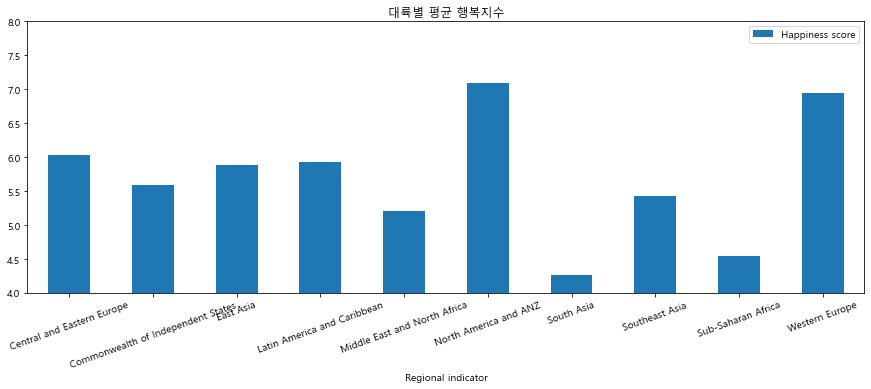

In [66]:
graph.plot(kind='bar', 
           figsize=(15,5), 
           rot = 20,
          ylim=(4,8),
          title = '대륙별 평균 행복지수')
plt.show()

In [69]:
df1[df1['Country'] == 'korea']

,RANK,Country,Regional indicator,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption


In [70]:
df1['Country'].unique()

array(['Finland', 'Denmark', 'Iceland', 'Switzerland', 'Netherlands',
       'Sweden', 'Norway', 'Israel', 'New Zealand', 'Austria',
       'Australia', 'Ireland', 'Germany', 'Canada', 'United States',
       'United Kingdom', 'Belgium', 'France', 'Bahrain', 'Slovenia',
       'Costa Rica', 'United Arab Emirates', 'Saudi Arabia',
       'Taiwan Province of China', 'Singapore', 'Romania', 'Spain',
       'Uruguay', 'Italy', 'Kosovo', 'Malta', 'Lithuania', 'Slovakia',
       'Estonia', 'Panama', 'Brazil', 'Kazakhstan', 'Cyprus', 'Latvia',
       'Serbia', 'Chile', 'Nicaragua', 'Mexico', 'Croatia', 'Poland',
       'El Salvador', 'Hungary', 'Mauritius', 'Uzbekistan', 'Japan',
       'Honduras', 'Portugal', 'Argentina', 'Greece', 'South Korea',
       'Philippines', 'Thailand', 'Moldova', 'Jamaica', 'Kyrgyzstan',
       'Colombia', 'Bosnia and Herzegovina', 'Mongolia',
       'Dominican Republic', 'Malaysia', 'Bolivia', 'China', 'Paraguay',
       'Peru', 'Montenegro', 'Ecuador', 'Vietnam'

- 컬럼에서 내가 원하는 값 찾는 방법
- 데이터프레임명[컬럼명].str.contains('korea' , case = None)
- 데이터프레임의 컬럼에서 대소문자 가리지말고 korea라는 문자열을 포함하는 값을 찾아주라

In [73]:
df1[df1['Country'].str.contains('korea', case=None)]

,RANK,Country,Regional indicator,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
54,55,South Korea,East Asia,5.935,6.021,5.849,1.656,1.851,0.886,0.841,0.414,0.111,0.176


## 각 지표들끼리 어떤 상관관계가 있는가?

In [75]:
df1.corr()

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
RANK,1.000000,-0.974446,-0.972470,-0.975823,-0.468325,-0.797773,-0.803726,-0.731881,-0.603034,-0.003571,-0.490280
Happiness score,-0.974446,1.000000,0.999707,0.999722,0.525248,0.770770,0.816519,0.725894,0.633770,0.034064,0.495028
Whisker-high,-0.972470,0.999707,1.000000,0.998858,0.535333,0.762926,0.813173,0.718455,0.636489,0.035618,0.490891
Whisker-low,-0.975823,0.999722,0.998858,1.000000,0.515047,0.777974,0.819366,0.732788,0.630821,0.032537,0.498855
Dystopia (1.83) + residual,-0.468325,0.525248,0.535333,0.515047,1.000000,-0.017546,0.155488,-0.001629,0.216028,-0.022707,0.013961
Explained by: GDP per capita,-0.797773,0.770770,0.762926,0.777974,-0.017546,1.000000,0.726210,0.817193,0.397303,-0.163301,0.426838
Explained by: Social support,-0.803726,0.816519,0.813173,0.819366,0.155488,0.726210,1.000000,0.710337,0.497137,0.032994,0.307637
Explained by: Healthy life expectancy,-0.731881,0.725894,0.718455,0.732788,-0.001629,0.817193,0.710337,1.000000,0.372340,-0.155914,0.390870
Explained by: Freedom to make life choices,-0.603034,0.633770,0.636489,0.630821,0.216028,0.397303,0.497137,0.372340,1.000000,0.203460,0.439110
Explained by: Generosity,-0.003571,0.034064,0.035618,0.032537,-0.022707,-0.163301,0.032994,-0.155914,0.203460,1.000000,0.146966


<Figure size 576x504 with 0 Axes>

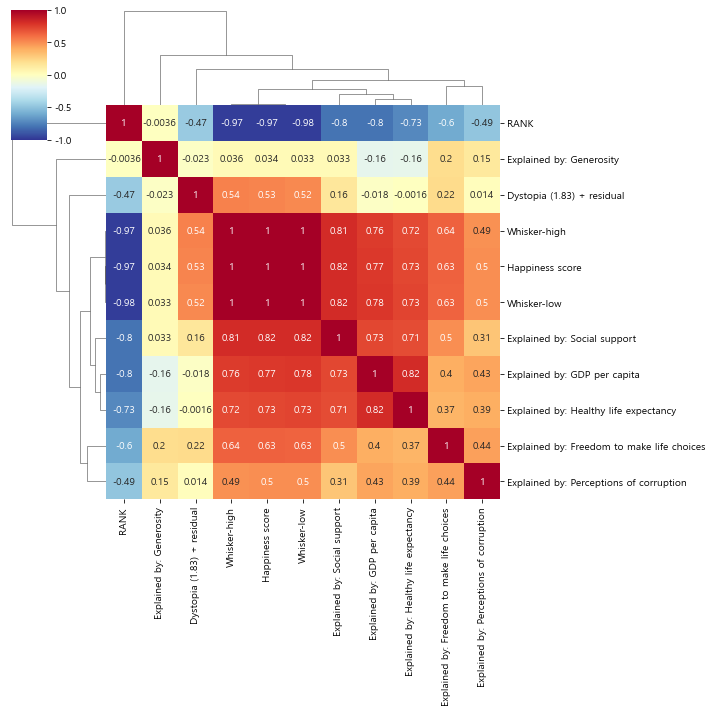

In [88]:
import seaborn as sns

corrmat = df1.corr() # 데이터 상관관계 매트릭스를 생성한다.
plt.figure(figsize=(8,7))
sns.color_palette('Paired')

sns.clustermap(corrmat, 
               annot = True, # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

# 데이터 통합하기
- merge()  
- 형식 pd.merge(df1 , df2 , on='이름',how = 'right') how 옵션 left, right, outer

In [5]:
import pandas as pd
df1 = {'이름' : ['홍길동','이순신','신사임당'],
       '나이' : [23,55,48],
       '성별' :['남','남','여']}
df1 = pd.DataFrame(df1)
df1

,이름,나이,성별
0,홍길동,23,남
1,이순신,55,남
2,신사임당,48,여


In [6]:
df2 = {'이름' : ['홍길동','홍길동','홍길동','신사임당','장보고'],
       '영화' : ['터미네이터','비긴어게인','살인의추억','비긴어게인','살인의추억'],
       '평점' :[5,2,4,5,3]}
df2 = pd.DataFrame(df2)
df2

,이름,영화,평점
0,홍길동,터미네이터,5
1,홍길동,비긴어게인,2
2,홍길동,살인의추억,4
3,신사임당,비긴어게인,5
4,장보고,살인의추억,3


In [8]:
pd.merge(df1,df2)

,이름,나이,성별,영화,평점
0,홍길동,23,남,터미네이터,5
1,홍길동,23,남,비긴어게인,2
2,홍길동,23,남,살인의추억,4
3,신사임당,48,여,비긴어게인,5


In [11]:
pd.merge(df1,df2, how='outer')

,이름,나이,성별,영화,평점
0,홍길동,23.0,남,터미네이터,5.0
1,홍길동,23.0,남,비긴어게인,2.0
2,홍길동,23.0,남,살인의추억,4.0
3,이순신,55.0,남,NaN,NaN
4,신사임당,48.0,여,비긴어게인,5.0
5,장보고,NaN,NaN,살인의추억,3.0
